<p style="font-weight:bold;text-align:center;font-size:25px;">Tutorial</p>
<p style="font-weight:600;text-align:center;font-size:20px;">Como utilizar a API da Área de Transparência do Portal do SNS</p>

Este artigo demonstra a recolha e exploração de <a href="https://transparencia.sns.gov.pt/explore/?sort=title">dados disponibilizados</a> pelo <a href="https://www.sns.gov.pt/">Serviço Nacional de Saúde</a>, nomeadamente:

* Mostra como obter dados utilizando a <a href="https://transparencia.sns.gov.pt/api/v1/console/datasets/1.0/search/">API</a> disponibilizada pela área de <a href="https://www.sns.gov.pt/transparencia/">Transparência do Portal do Serviço Nacional de Saúde</a>;
* Analisa a distribuição de população e instituições hospitalares pelas diversas regiões de Portugal Continental;
* Ilustra o impacto do COVID-19 no Sistema Nacional de Saúde através da variação mensal no número de Consultas Médicas Hospitalares antes e durante a pandemia, iniciando a análise no detalhe do Instituto Português Oncologia de Lisboa, e generalizando-a às restantes instituições e regiões (Administrações Regionais de Saúde) em Portugal Continental.

Este artigo está disponível como um notebook por forma a permitir uma experiência hands-on, online:

<table><tr>
<td> <a href="https://github.com/zevarela/dssg/blob/main/Tutorial_SNS_2021-10.ipynb" role="button" target="_blank"><img class="notebook-badge-image" src="assets/github.svg" alt="View On GitHub"></a> </td>
<td> <a href="https://nbviewer.jupyter.org/github/zevarela/dssg/blob/main/Tutorial_SNS_2021-10.ipynb" role="button" target="_blank"><img class="notebook-badge-image" src="assets/nbviewer.svg" alt="View On nbviewer"></a> </td>
<td> <a href="https://mybinder.org/v2/gh/zevarela/dssg/main?filepath=Tutorial_SNS_2021-10.ipynb" target="_blank"><img src="assets/binder.svg" alt="Open In Binder"></a> </td>
<td> <a href="https://colab.research.google.com/github/zevarela/dssg/blob/main/Tutorial_SNS_2021-10.ipynb" target="_blank"><img src="assets/colab.svg" alt="Open In Colab"></a> </td>
</tr></table>

## Índice

 1. [Introdução](#1.-Introdução)
    1. [O que é a API da Área da Transparência do Portal do SNS?](#1.A.-O-que-%C3%A9-a-API-da-%C3%81rea-da-Transpar%C3%AAncia-do-Portal-do-SNS?)
    2. [Porquê usar uma API?](#1.B.-Porquê-usar-uma-API?)
    3. [O que é necessário para correr este tutorial?](#1.C.-O-que-%C3%A9-necess%C3%A1rio-para-correr-este-tutorial?)
 2. [Análise de dados](#2.-Análise-de-dados)
    1. [Consultas Médicas Hospitalares](#2.A.-Consultas-Médicas-Hospitalares)
    2. [Utentes inscritos em Cuidados de Saúde Primários (CSP)](#2.B.-Utentes-inscritos-em-Cuidados-de-Saúde-Primários-(CSP))
    3. [Distribuição das consultas por instituição](#2.C.-Distribuição-das-consultas-por-instituição)
    4. [Distribuição das consultas por região](#2.D.-Distribuição-das-consultas-por-região)
 3. [Conclusão](#3.-Conclusão)

## 1. Introdução

### 1.A. O que é a API da Área da Transparência do Portal do SNS?
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

API vem do acrónimo em inglês _Application Programming Interface_ e refere-se a um conjunto de normas que permite a programas comunicar entre si.

Esta API permite que os dados que o <a href="https://www.sns.gov.pt/">Serviço Nacional de Saúde</a> disponibiliza na sua <a href="https://transparencia.sns.gov.pt/explore/?sort=title">Área da Transparência</a> possam ser utilizados não só por seres humanos, mas também por programas que deles necessitem. 

Neste tutorial vamos utilizar a _OpenDataSoft API_ para obter e visualizar dados disponibilizados pelo SNS.

### 1.B. Porquê usar uma API?
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Para automatizar tarefas que de outra forma seriam tediosas. Por exemplo, a Sofia que adora dados e saúde, ao descobrir o Portal do SNS decide criar um notebook para acompanhar a evolução de diversos indicadores que lhe interessam. Todas as semanas vai ao portal procurar os dados que lhe interessam, descarregar os dados, colocar na pasta do notebook, e atualizar a sua análise. No blog da DSSG a Sofia encontra este tutorial, e usando a API passa a ter dados sempre frescos instantâneamente, sem sequer ter de abrir o site!

A API disponível no portal do SNS é baseada num produto <a href="https://www.opendatasoft.com/">OpenDataSoft</a> e permite não só procurar e obter *datasets* (conjuntos de dados) sobre um tema específico, mas também procurar dados com características específicas e até efetuar algumas operações sobre os mesmos, como por exemplo agrupá-los por `ano` ou por `localização`.

Existem neste momento duas versões da API cuja documentação pode ser consultada: a <a href="https://transparencia.sns.gov.pt/api/v1/console/datasets/1.0/search/">versão 1.0</a> e a nova <a href="https://transparencia.sns.gov.pt/api/v2/console">versão 2.0</a> que ainda está em desenvolvimento.

### 1.C. O que é necessário para correr este tutorial?
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Basta abrir <a href="https://colab.research.google.com/github/zevarela/dssg/blob/master/Tutorial_SNS_2021-09.ipynb" target="_blank">este notebook no Google Colab</a>, por exemplo, e instalar as bibliotecas necessárias:

*  `odsclient` que permite facilmente aceder aos dados do portal do SNS bem como <a href="https://data.opendatasoft.com/explore/">muitos outros portais</a> que fornecem dados no mesmo formato;
* `numpy` e `pandas` para manipular os dados;
* `matplotlib` e `seaborn` para as visualizações.

A instalação das bibliotecas necessárias é muito simples, dentro de um notebook basta correr a linha abaixo numa célula do notebook:

In [ ]:
!pip install numpy pandas matplotlib seaborn odsclient[full]

Alternativamente poderá usar as mesmas versões que utilizámos para criar este notebook: 

`!pip install -r requirements.txt`

## 2. Análise de dados

### 2.A. Consultas Médicas Hospitalares
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Vamos olhar para os dados disponibilizados na área de Transparência do Portal do SNS sobre <a href="https://transparencia.sns.gov.pt/explore/dataset/01_sica_evolucao-mensal-das-consultas-medicas-hospitalares">Consultas Médicas Hospitalares</a>. 

A informação atualmente disponível sobre este dataset informa:

_"Monitorizar mensalmente o número de consultas médicas hospitalares em território nacional, por entidade hospitalar._

* _Primeiras Consultas médicas são as consultas externas em que o utente é examinado pela primeira vez num serviço de especialidade, referente a um episódio clínico._
* _Consultas Subsequentes são as consultas médicas para verificação da evolução do estado de saúde do doente, prescrição terapêutica e/ou preventiva, tendo como referência a primeira consulta._

_Observações: Não inclui as consultas de medicina no trabalho. Os dados referentes ao mês n-1 publicados no dia 26 do mês n."_


Na <a href="https://transparencia.sns.gov.pt/explore/dataset/01_sica_evolucao-mensal-das-consultas-medicas-hospitalares/api/?sort=periodo">tab API</a> do nosso dataset podemos encontrar o nome do dataset `01_sica_evolucao-mensal-das-consultas-medicas-hospitalares` e isso é tudo o que necessitamos para obter os dados como um pandas `DataFrame`:

In [2]:
%matplotlib inline

from calendar import month_abbr
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator
import numpy as np
from odsclient import get_whole_dataframe
import pandas as pd
import seaborn as sns


df_hosp = get_whole_dataframe("01_sica_evolucao-mensal-das-consultas-medicas-hospitalares", 
                              base_url="https://transparencia.sns.gov.pt/", tqdm=True, use_keyring=False)

# Limitamos o dataset para que as conclusões obtidas na data de publicação permaneçam válidas
df_hosp = df_hosp[df_hosp['Período']<='2021-08'].reset_index(drop=True)
df_hosp.head(10)

https://transparencia.sns.gov.pt/explore/dataset/01_sica_evolucao-mensal-das-consultas-medicas-hospitalares/download/: 0.00B [00:01, ?B/s]


,Período,Periodo_format_2,Região,Instituição,Localização Geográfica,Nº Consultas Médicas Total,Nº Primeiras Consultas,Nº Consultas Subsequentes
0,2015-07,2015/07/01,Região de Saúde do Centro,Hospital Arcebispo João Crisóstomo,"40.3470015,-8.5933462",11246,5333,5913
1,2015-07,2015/07/01,Região de Saúde do Centro,Hospital Dr. Francisco Zagalo,"40.8571967,-8.6318023",19318,7621,11697
2,2015-07,2015/07/01,Região de Saúde LVT,"Centro Hospitalar de Setúbal, EPE","38.5283754,-8.8818638",131775,39302,92473
3,2015-07,2015/07/01,Região de Saúde LVT,"Hospital Professor Doutor Fernando Fonseca, EPE","38.7422257,-9.2264834",173878,53793,120085
4,2015-07,2015/07/01,Região de Saúde LVT,"Hospital Garcia de Orta, EPE","38.6658713,-9.1822554",166128,46726,119402
5,2015-07,2015/07/01,Região de Saúde LVT,Instituto Gama Pinto,"38.7218793,-9.144249",31416,16100,15316
6,2015-07,2015/07/01,Região de Saúde Norte,"Centro Hospitalar do Médio Ave, EPE","41.3423984,-8.4802503",102348,31171,71177
7,2015-07,2015/07/01,Região de Saúde Norte,"Centro Hospitalar Trás-os-Montes e Alto Douro,...","41.3031784,-7.7515252",177817,47074,130743
8,2015-07,2015/07/01,Região de Saúde Norte,"Hospital da Senhora da Oliveira, Guimarães, EPE","41.4387173,-8.3086907",167554,46779,120775
9,2015-07,2015/07/01,Região de Saúde Norte,"Instituto Português Oncologia do Porto, EPE","41.1785642,-8.6062881",166331,51169,115162


In [3]:
df_hosp.describe()

,Nº Consultas Médicas Total,Nº Primeiras Consultas,Nº Consultas Subsequentes
count,5117.000000,5117.000000,5117.000000
mean,129475.958569,36893.871409,92582.087160
std,140371.217377,37423.969861,103813.641825
min,232.000000,95.000000,137.000000
25%,36768.000000,10629.000000,25596.000000
50%,82447.000000,24861.000000,57255.000000
75%,171942.000000,50167.000000,121461.000000
max,912095.000000,227493.000000,698196.000000


Além do mês a que se referem os dados (com dois formatos distintos!), temos a instituição, a localização geográfica, e números de consultas.

O `Nº Consultas Médicas Total` tem um desvio padrão de 140k, variando entre um mínimo de 232 e um máximo de 912 095 consultas num único mês, o que parece indiciar uma elevada diversidade nas instuições representadas, que vão desde pequenas Unidades de Saúde Locais, até Centros Hospitalares que agregam vários hospitais.

Faz então sentido juntar a população servida para ajudar contextualizar estes números.

### 2.B. Utentes inscritos em Cuidados de Saúde Primários (CSP)
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Vamos olhar para os dados disponibilizados sobre <a href="https://transparencia.sns.gov.pt/explore/dataset/utentes-inscritos-em-cuidados-de-saude-primarios">Utentes inscritos em Cuidados de Saúde Primários (CSP)</a> para ilustrar a distribuição de utentes por região, possibilitando a comparação entre o número de instituições e a população que as mesmas servem.

Informação sobre este dataset:

_"Monitoriza a informação dos utentes inscritos por ARS e a nível Nacional (Portugal Continental), para utentes inscritos em unidades funcionais dos ACES (Agrupamento de Centros de Saúde)._

_O BI do indicador está disponível em [http://sim-sns.min-saude.pt/ncsp_acss/BI.aspx?id=2&fonte=DW_ACSS](http://sim-sns.min-saude.pt/ncsp_acss/BI.aspx?id=2&fonte=DW_ACSS)._

_Observações: Não inclui informação referente a utentes inscritos em "postos empresa"._

_Os dados de indicadores de utilização estão congelados a abril para a ARS Algarve, em julho para a ARS LVT e em agosto para as restantes ARS."_

Apesar dos dados estarem de momento ligeiramente desatualizados parece-nos ser de momento uma fonte de informação relevante dada a baixa variabilidade da localização da população.

In [4]:
df_utentes = get_whole_dataframe("utentes-inscritos-em-cuidados-de-saude-primarios",
                                 base_url="https://transparencia.sns.gov.pt/", tqdm=True, use_keyring=False);

# Limitamos o dataset para que as conclusões obtidas na data de publicação permaneçam válidas
df_utentes = df_utentes[df_utentes['Período']<='2021-08']

ars_map = {
    'ARS Alentejo': 'Região de Saúde do Alentejo',
    'ARS Centro': 'Região de Saúde do Centro',
    'ARS Lisboa e Vale do Tejo': 'Região de Saúde LVT',
    'ARS Norte': 'Região de Saúde Norte',
    'ARS Algarve': 'Região de Saúde do Algarve'
}

df_utentes["Região"] = df_utentes["ARS"].map(ars_map)
df_utentes.head(3)

https://transparencia.sns.gov.pt/explore/dataset/utentes-inscritos-em-cuidados-de-saude-primarios/download/: 0.00B [00:01, ?B/s]


,Período,ARS,ACES,Localização Geográfica,Utentes Inscritos CSP,Total Utentes com MdF atribuído,% Total Utentes com MdF atribuído,Total Utentes sem MdF Atribuído,% Total Utentes sem MdF Atribuído,Total Utentes sem MdF Atribuído por Opção,% Total Utentes sem MdF Atribuído por Opção,Taxa de Utilização Consultas Médicas 1 Ano (Todos os Utentes),Taxa de Utilização Consultas Médicas 1 Ano (Nos Utentes sem MdF),Região
0,2016-01,ARS Alentejo,ACES Alentejo Central,"38.8442031,-7.5826619",167036,163811,"98,07",3041,"1,82",184,"0,11","76,2339","75,2022",Região de Saúde do Alentejo
1,2016-01,ARS Alentejo,ACES Baixo Alentejo,"38.0153039,-7.8627308",168445,126390,"75,03",41049,"24,37",1006,"0,60","58,5825","48,836",Região de Saúde do Alentejo
2,2016-01,ARS Alentejo,ACES São Mamede,"39.2967086,-7.4284755",253447,234986,"92,72",18146,"7,16",315,"0,12","58,0867","39,402",Região de Saúde do Alentejo


Neste dataset podemos verificar que obtemos a informação do Número de utentes inscritos em CSP por mês, por ARS e ACES (com a respetiva localização geográfica também). De forma a manter-se uma uniformidade na notação, criou-se uma coluna adicional chamada "Região" cujos valores possíveis correspondem aos valores da coluna "ARS". 

Vamos então visualizar o número de instituições e os respetivos utentes:

,Instituição,Utentes
Região,,
LVT,17,249437830
Norte,18,255848774
Alentejo,4,34651973
Algarve,1,32905905
Centro,13,120965779


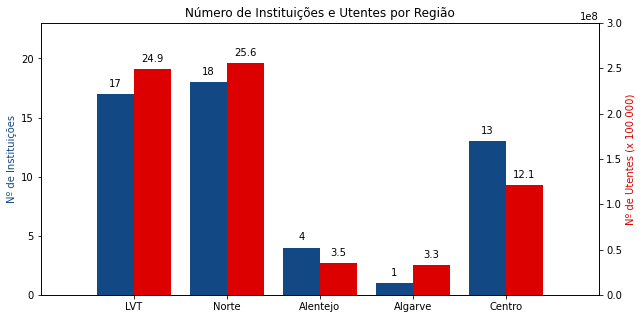

In [5]:
df_num_inst = df_hosp[['Região', 'Instituição']].groupby('Região').nunique()
df_num_inst['Utentes'] = df_utentes.groupby("Região").sum()["Utentes Inscritos CSP"]
df_num_inst.index = df_num_inst.index.str.replace(r"Região de Saúde (?:do )?", "", regex=True)
display(df_num_inst)

bar_width = 0.4
label_scale = 0.02
height_inst = 23
height_utentes = 3e8
color_inst = '#124984'
color_utentes = '#DD0000'

ax = df_num_inst['Instituição'].plot(kind='bar', width=-bar_width, align="edge", color=color_inst, figsize=(10,5))
ax.set_title('Número de Instituições e Utentes por Região');
ax.set_ylabel('Nº de Instituições', color=color_inst);
ax.set_xlabel('');
ax.set_ylim(0, height_inst)
ax.set_xlim(-1, 5)

for bar, value in zip(ax.patches, df_num_inst.Instituição.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + label_scale * height_inst,
            value, ha='center', va='bottom')

ax2 = ax.twinx()
ax2.set_ylim(0, height_utentes)
ax2.set_ylabel('Nº de Utentes (x 100.000)', color=color_utentes)
ax2.bar(df_num_inst.index, df_num_inst["Utentes"], color=color_utentes, width=bar_width, align="edge")

for bar, value in zip(ax2.patches, df_utentes.groupby("Região").sum()["Utentes Inscritos CSP"].values):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + label_scale * height_utentes, 
             round(value/1e7,1), ha='center', va='bottom')

ax2.xaxis.set_major_locator(FixedLocator(range(len(df_num_inst.index))))
ax.set_xticklabels(df_num_inst.index, rotation=0);

plt.show()

No geral, o nº de instituições em cada Região tende a acompanhar o nº de utentes inscritos em Cuidados de Saúde Primários pertencentes a cada região.

### 2.C. Distribuição das consultas por instituição
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Para obter uma primeira ideia dos dados iremos analisar a variabilidade do número de consultas em cada instituição e região:

In [6]:
df_grouped = df_hosp.groupby(['Região','Instituição']).agg({'Período' : ['min', 'max', 'count'],
                                               'Nº Consultas Médicas Total':['sum', 'min', 'max', 'mean','std']}).copy()
df_grouped

Período  \
                                                                                    min   
Região                      Instituição                                                   
Região de Saúde LVT         Centro Hospitalar Barreiro/Montijo, EPE             2013-01   
                            Centro Hospitalar Médio Tejo, EPE                   2013-01   
                            Centro Hospitalar Psiquiátrico de Lisboa            2013-01   
                            Centro Hospitalar Universitário Lisboa Central,...  2013-01   
                            Centro Hospitalar Universitário de Lisboa Norte...  2013-01   
                            Centro Hospitalar de Lisboa Ocidental, EPE          2013-01   
                            Centro Hospitalar de Setúbal, EPE                   2013-01   
                            Centro Hospitalar do Oeste, EPE                     2013-01   
                            Hospital Distrital de Santarém, EPE                 2013-01   
                            Hospital Garcia de Orta, EPE                        2013-01   
                            Hospital Professor Doutor Fernando Fonseca, EPE     2013-01   
                            Hospital de Cascais, PPP                            2013-01   
                            Hospital de Loures, PPP                             2013-01   
                            Hospital de Vila Franca de Xira, EPE                2021-06   
                            Hospital de Vila Franca de Xira, PPP                2013-01   
                            Instituto Gama Pinto                                2013-01   
                            Instituto Português Oncologia de Lisboa, EPE        2013-01   
Região de Saúde Norte       Centro Hospitalar Entre Douro e Vouga, EPE          2013-01   
                            Centro Hospitalar Póvoa de Varzim/Vila do Conde...  2013-01   
                            Centro Hospitalar Trás-os-Montes e Alto Douro, EPE  2013-01   
                            Centro Hospitalar Tâmega e Sousa, EPE               2013-01   
                            Centro Hospitalar Universitário de São João, EPE    2013-01   
                            Centro Hospitalar Universitário do Porto, EPE       2013-01   
                            Centro Hospitalar Vila Nova de Gaia/Espinho, EPE    2013-01   
                            Centro Hospitalar do Alto Ave, EPE                  2013-01   
                            Centro Hospitalar do Médio Ave, EPE                 2013-01   
                            Hospital Santa Maria Maior, EPE                     2013-01   
                            Hospital da Senhora da Oliveira, Guimarães, EPE     2015-01   
                            Hospital de Braga, EPE                              2019-09   
                            Hospital de Braga, PPP                              2013-01   
                            Hospital de Magalhães Lemos, EPE                    2013-01   
                            Instituto Português Oncologia do Porto, EPE         2013-01   
                            Unidade Local de Saúde de Matosinhos, EPE           2013-01   
                            Unidade Local de Saúde do Alto Minho, EPE           2013-01   
                            Unidade Local de Saúde do Nordeste, EPE             2013-01   
Região de Saúde do Alentejo Hospital Espírito Santo de Évora, EPE               2013-01   
                            Unidade Local de Saúde do Baixo Alentejo, EPE       2013-01   
                            Unidade Local de Saúde do Litoral Alentejano, EPE   2013-01   
                            Unidade Local de Saúde do Norte Alentejano, EPE     2013-01   
Região de Saúde do Algarve  Centro Hospitalar Universitário do Algarve,EPE      2013-01   
Região de Saúde do Centro   Centro Hospitalar Tondela-Viseu, EPE                2013-01   
                            Centro Hospitalar Universitário Cova da Beira, E

Da análise desta tabela observamos que os dados são entre Janeiro de 2013 e Agosto de 2021, mas nem todas as instituições têm todos os meses (104 registos).

Vamos ver o detalhe dessas instituições:

In [7]:
max_count = df_grouped[('Período', 'count')].max()
df_grouped[df_grouped.loc[:, ('Período', 'count')] != max_count]

Período  \
                                                                               min   
Região                    Instituição                                                
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE             2021-06   
                          Hospital de Vila Franca de Xira, PPP             2013-01   
Região de Saúde Norte     Centro Hospitalar do Alto Ave, EPE               2013-01   
                          Hospital da Senhora da Oliveira, Guimarães, EPE  2015-01   
                          Hospital de Braga, EPE                           2019-09   
                          Hospital de Braga, PPP                           2013-01   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo               2013-01   
                          Hospital José Luciano de Castro                  2013-01   

                                                                                    \
                                                                               max   
Região                    Instituição                                                
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE             2021-08   
                          Hospital de Vila Franca de Xira, PPP             2021-05   
Região de Saúde Norte     Centro Hospitalar do Alto Ave, EPE               2014-12   
                          Hospital da Senhora da Oliveira, Guimarães, EPE  2021-08   
                          Hospital de Braga, EPE                           2021-08   
                          Hospital de Braga, PPP                           2019-08   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo               2021-05   
                          Hospital José Luciano de Castro                  2014-12   

                                                                                 \
                                                                          count   
Região                    Instituição                                             
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE                3   
                          Hospital de Vila Franca de Xira, PPP              101   
Região de Saúde Norte     Centro Hospitalar do Alto Ave, EPE                 24   
                          Hospital da Senhora da Oliveira, Guimarães, EPE    80   
                          Hospital de Braga, EPE                             24   
                          Hospital de Braga, PPP                             80   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo                101   
                          Hospital José Luciano de Castro                    24   

                                                                          Nº Consultas Médicas Total  \
                                                                                                 sum   
Região                    Instituição                                                                  
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE                                264228   
                          Hospital de Vila Franca de Xira, PPP                               7777167   
Região de Saúde Norte     Centro Hospitalar do Alto Ave, EPE                                 3308126   
                          Hospital da Senhora da Oliveira, Guimarães, EPE                   10806340   
                          Hospital de Braga, EPE                                             5989115   
                          Hospital de Braga, PPP                                            18142017   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo                                  925008   
                          Hospital José Luciano de Castro                                     163011   

                                                                                  \
                                      

Dado que vários hospitais mudaram de nome durante esta janela temporal, vamos uniformizar os seus nomes para os nomes atuais.

In [8]:
old_name_map = {i:i for i in df_hosp["Instituição"].unique()}

old_name_map.update({
    "Hospital de Vila Franca de Xira, PPP": "Hospital de Vila Franca de Xira, EPE",
    "Centro Hospitalar do Alto Ave, EPE": "Hospital da Senhora da Oliveira, Guimarães, EPE",
    "Hospital de Braga, PPP": "Hospital de Braga, EPE"
})

df_hosp["Instituição"] = df_hosp["Instituição"].map(old_name_map)


df_grouped = df_hosp.groupby(['Região','Instituição']).agg({
    'Período' : ['min', 'max', 'count'],
    'Nº Consultas Médicas Total':['sum', 'min', 'max', 'mean','std']}).copy()

df_grouped.loc[
    (["Região de Saúde LVT", "Região de Saúde Norte", "Região de Saúde do Centro"], 
     ["Hospital de Vila Franca de Xira, EPE", "Hospital de Vila Franca de Xira, PPP",
      "Centro Hospitalar do Alto Ave, EPE", "Hospital da Senhora da Oliveira, Guimarães, EPE",
      "Hospital de Braga, PPP", "Hospital de Braga, EPE",
      "Hospital Arcebispo João Crisóstomo",
      "Hospital José Luciano de Castro"]), :]

Período  \
                                                                               min   
Região                    Instituição                                                
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE             2013-01   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE  2013-01   
                          Hospital de Braga, EPE                           2013-01   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo               2013-01   
                          Hospital José Luciano de Castro                  2013-01   

                                                                                    \
                                                                               max   
Região                    Instituição                                                
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE             2021-08   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE  2021-08   
                          Hospital de Braga, EPE                           2021-08   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo               2021-05   
                          Hospital José Luciano de Castro                  2014-12   

                                                                                 \
                                                                          count   
Região                    Instituição                                             
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE              104   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE   104   
                          Hospital de Braga, EPE                            104   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo                101   
                          Hospital José Luciano de Castro                    24   

                                                                          Nº Consultas Médicas Total  \
                                                                                                 sum   
Região                    Instituição                                                                  
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE                               8041395   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE                   14114466   
                          Hospital de Braga, EPE                                            24131132   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo                                  925008   
                          Hospital José Luciano de Castro                                     163011   

                                                                                  \
                                                                             min   
Região                    Instituição                                              
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE              9231   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE  19613   
                          Hospital de Braga, EPE                           32909   
Região de Saúde do Centro Hospital Arcebispo João Crisóstomo                 922   
                          Hospital José Luciano de Castro                   1023   

                                                                                   \
                                                                              max   
Região                    Instituição                                               
Região de Saúde LVT       Hospital de Vila Franca de Xira, EPE             167371   
Região de Saúde Norte     Hospital da Senhora da Oliveira, Guimarães, EPE  264654   
                          Hospital de Braga, EPE                           472311   
Região de Saúde 

Na tabela acima, podemos concluir que os nomes foram corretamente uniformizados (104 registos), faltando dados apenas para dois hospitais (Hospital Arcebispo João Crisóstomo e Hospital José Luciano de Castro) cuja informação deixou de ser disponibilizada no Portal Transparência do SNS.

Continuando com a nossa análise:
* O número mínimo de consultas médicas é <b id='metrica'>muito menor do que a média (16.34% da média)</b> - isto acontece de forma consistente para todas as instituições

In [9]:
appointments_comparison = (df_grouped.loc[:, ("Nº Consultas Médicas Total", "min")]\
 /df_grouped.loc[:, ("Nº Consultas Médicas Total", "mean")]).max()

print(f'{appointments_comparison * 100:.2f}%')

16.34%


Estes dados são muito estranhos, vamos escolher um hospital em particular e tentar descobrir o que se passa. 

Focando o **IPO de Lisboa**:

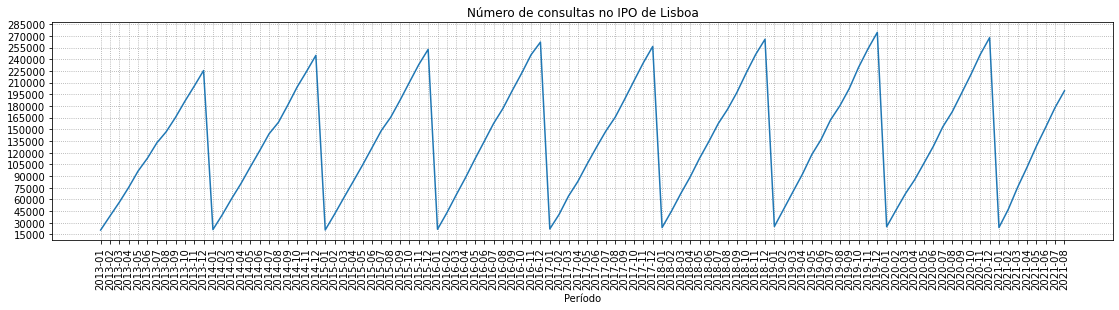

In [10]:
instituição = 'Instituto Português Oncologia de Lisboa, EPE'
df = df_hosp[df_hosp.Instituição==instituição].sort_values('Período').set_index('Período', drop=False)
ax=df['Nº Consultas Médicas Total'].plot(figsize=(19, 4));
ax.set_xticks(range(len(df["Período"])))
ax.set_xticklabels(df["Período"], rotation=90);
ax.set_title('Número de consultas no IPO de Lisboa');
ymax = df["Nº Consultas Médicas Total"].max()
ax.yaxis.set_major_locator(MultipleLocator(int(np.floor(ymax * 1.05 / 1000 / 19) * 1000)))
ax.grid(which='major', color='#A0A0A0', linestyle=':');

Analisando o gráfico compreende-se que o número de consultas mensal é cumulativo ao longo de cada ano, o que impede a comparação direta entre meses.

O primeiro passo seria transformar os dados cumulativos em dados mensais.

1. Começamos por criar `pivot_mes` que tem:
  * linhas que representam cada instituição com presença de dados em todos os meses
  * colunas cujos nomes são datas, ex: 2019-01-01, ..., 2021-07-01
  * os valores são o número de consultas nessa instituição acumuladas anualmente até esse mês
2. Vamos usá-lo para  criar `df_inst` cujos valores indicam o número de consultas realizadas nessa instituição apenas nesse mês, e para isso:
  * Substituímos cada mês pela diferença entre o valor atual e o valor anterior, efetivamente desfazendo os valores acumulados identificados anteriormente
  * Em janeiro de cada ano repomos o valor que estava originalmente em `pivot_mes` porque os acumulados recomeçam anualmente em janeiro

In [11]:
def get_df_diff(df, first_index, col='Instituição'):
    df_mes = df.copy()
    df_mes['Mês'] = pd.to_datetime(df_mes['Período'] , format='%Y-%m')  
    df_mes['Dia'] = pd.to_datetime(df_mes['Periodo_format_2'] , format='%Y/%m/%d')
    pivot_mes = pd.pivot_table(df_mes, values='Nº Consultas Médicas Total',
                           index=[col], columns=['Dia'], aggfunc='sum')
    df_inst = pivot_mes.T.diff()
    df_inst = df_inst.where(df_inst>1).T.iloc[:, first_index:]
    for i in range(0, len(df_inst.columns), 12):
        df_inst.iloc[:, i] = pivot_mes.iloc[:, first_index+i]
    return df_inst

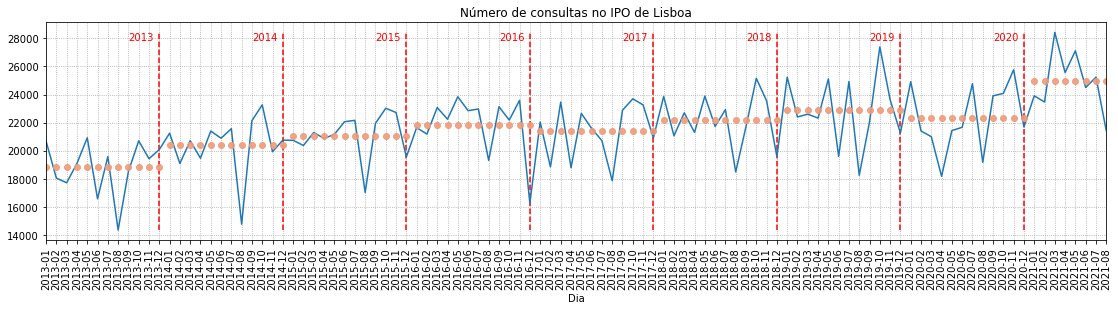

In [12]:
df_diff_new = get_df_diff(df_hosp, 0)

IPO_index = [i for i in range(len(df_diff_new)) if df_diff_new.index[i] == instituição][0]

mean_per_year = np.array([df_diff_new.iloc[IPO_index, i-12:i].mean() for i in range(12, df_diff_new.shape[1]+12, 12)])
means = np.array([mean_per_year[i] for i in range(df_diff_new.columns.year.nunique()) for j in range(12)])
means = means[:df_diff_new.shape[1]]

years_arr = df_diff_new.columns.year.unique()
year_month_labels = [str(i).split('-')[0]+'-'+str(i).split('-')[1] for i in df_diff_new.columns]
dezembro_idx = [i for i,date in enumerate(df_diff_new.columns) if date.month == 12]
min_v, max_v = df_diff_new.iloc[IPO_index].min(), df_diff_new.iloc[IPO_index].max()

ax=df_diff_new.iloc[IPO_index].plot(figsize=(19, 4));
offset = ax.get_xticks()[0]
ax.set_xticks([offset+i for i in range(len(year_month_labels))]);
ax.set_xticklabels(year_month_labels, rotation=90);
ax.set_title('Número de consultas no IPO de Lisboa');
ax.vlines([offset+i for i in dezembro_idx], min_v, max_v, linestyles='dashed', colors='red');
for i, year_pos in enumerate([offset+i for i in dezembro_idx]): 
    plt.text(year_pos-3, max_v*0.98, years_arr[i], fontdict=None, c='red')
ax.grid(which='major', color='#A0A0A0', linestyle=':')

plt.plot(ax.get_xticks(), means, 'o', color = "#ef9b7a", alpha=0.9);

Da análise do gráfico acima verifica-se que o número total de consultas em 2020 no IPO sofreu um decréscimo principalmente entre os meses de fevereiro e maio face ao ano de 2019, atingindo-se mesmo o valor mínimo de consultas anual em abril. Este mínimo seria expectável que ocorresse no mês de agosto, como foi recorrente nos anos pré-pandemia (excepto em 2016).

Os ponteados horizontais correspondem aos valores médios anuais do número total de consultas no IPO, registando-se um aumento anual consistente desde 2013 até 2019, com excepção do ano de 2017.

Agora que se obteve um dataset com os valores mensais do número de consultas por instituição, vamos voltar a calcular a métrica que apresentámos <a href="#metrica">em cima</a>.

In [13]:
new_appointments_comparison = (df_diff_new.min(axis=1)/df_diff_new.mean(axis=1)).max()
print(f'{new_appointments_comparison * 100:.2f}%')

75.99%


Acima, no melhor caso, o número mínimo de consultas correspondia a cerca de 16% do valor médio para a instituição. Agora, o valor mínimo corresponde a cerca de 76% do valor médio de consultas, o que faz mais sentido visto que o valor médio já não é influenciado pelo acumulado dos meses anteriores. 

Vamos transpor a análise efetuada ao IPO para todas as instituições e apenas para os anos de 2019 e 2020, para avaliar o impacto da pandemia no número de consultas médicas no contexto nacional.

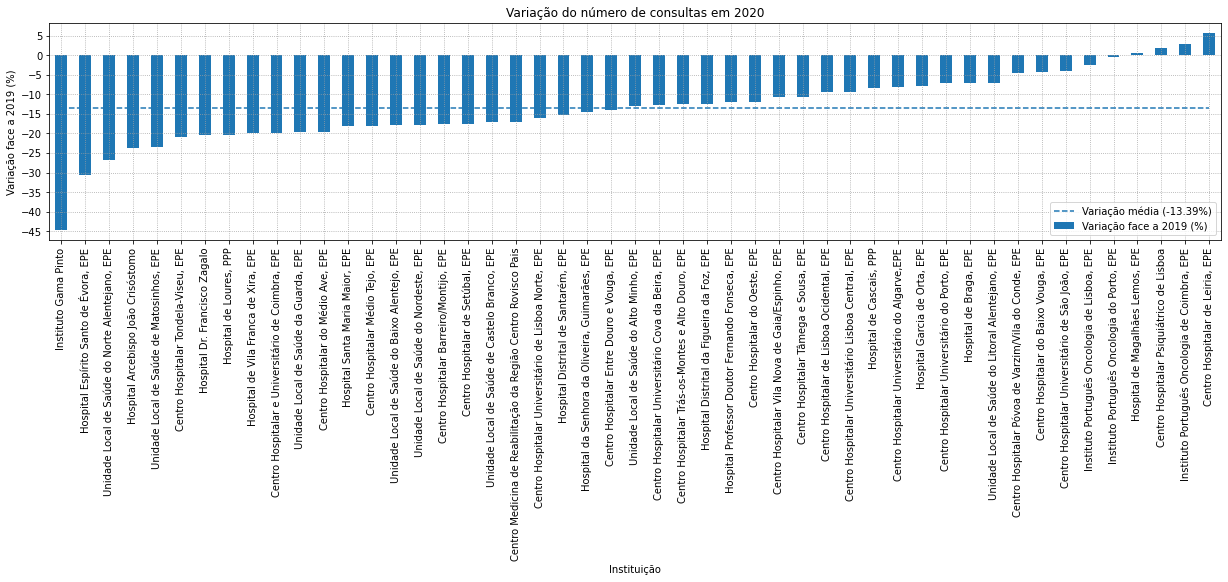

In [14]:
nome = 'Variação face a 2019 (%)'
df = df_hosp.copy()

df = df_hosp[['Período','Nº Consultas Médicas Total','Instituição']].copy().set_index('Instituição')
df = 100*(df[(df.Período=='2020-12')][['Nº Consultas Médicas Total']] - df[df.Período=='2019-12'][['Nº Consultas Médicas Total']])/df[df.Período=='2020-12'][['Nº Consultas Médicas Total']]
df.columns = [nome]

df.sort_values(by=nome, inplace=True)
ax = df.plot(figsize=(21,4), kind='bar')
ax.set_title('Variação do número de consultas em 2020');
ax.set_ylabel('Variação face a 2019 (%)');
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index, rotation=90);
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.grid(which='major', color='#A0A0A0', linestyle=':')
média =  np.ones(len(df.index))*df[nome].mean()
ax.plot(média, label=f"Variação média ({média[0]:.2f}%)", linestyle='--');
ax.legend(loc='lower right');

Há um decréscimo médio de 13.39% do número de consultas, embora o impacto seja extremamente variado, desde o Instituto Gama Pinto que fez cerca de metade das consultas que no ano anterior, até ao CH Leiria que prestou mais cerca de 5% de consultas que no ano anterior.

Como vimos na dataframe `df_grouped`, existem algumas instituições que não apresentam dados para todos os meses. Assim, iremos descartá-las nas análises seguintes.

In [15]:
df_mes = df_hosp.copy()
df_mes['Mês'] = pd.to_datetime(df_mes['Período'] , format='%Y-%m')  
df_mes['Dia'] = pd.to_datetime(df_mes['Periodo_format_2'] , format='%Y/%m/%d')

inst_nmonths = df_mes[['Instituição','Mês']].groupby('Instituição').nunique()
all_inst = len(inst_nmonths)
inst_nmonths = inst_nmonths[inst_nmonths.Mês == inst_nmonths.Mês.max()].index
df_mes = df_mes[df_mes.Instituição.isin(inst_nmonths)]
print(f"Existem {all_inst} instituições das quais vamos usar as \
{df_mes.Instituição.nunique()} que têm dados para todos os meses.")

Existem 50 instituições das quais vamos usar as 48 que têm dados para todos os meses.


Para estas instituições vamos olhar para as consultas desde 2019 e ver se notamos algum padrão nas consultas mensais.

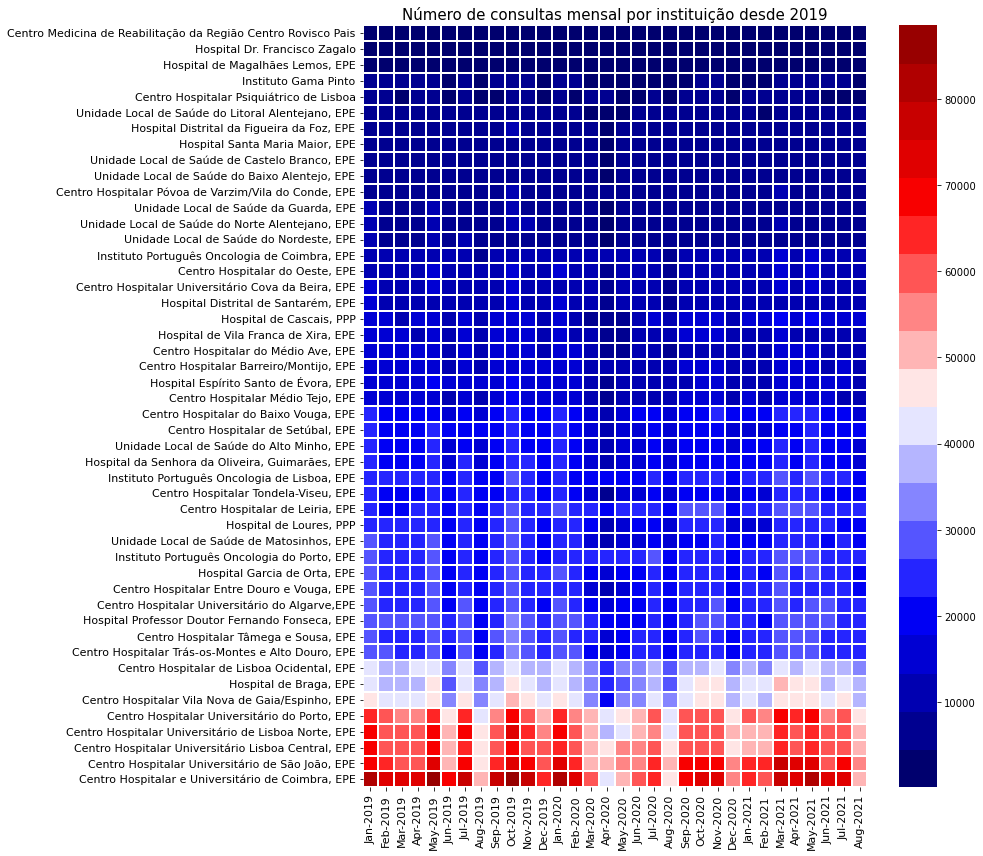

In [16]:
def get_month_labels_from_date_columns(df):
    return [f"{month_abbr[dt.month]}-{dt.year}" for dt in df.columns]
    
first_index = ((df_diff_new.columns >= '2019-01-01') == False).sum()
df_inst = get_df_diff(df_mes, first_index = first_index)
    
df_inst.sort_values(by='2019-01-01', inplace=True)
cmap = sns.color_palette('seismic', 20)
fig, ax = plt.subplots(figsize=(14, 12))
ax = sns.heatmap(df_inst, square=False, annot=False, cmap=cmap, linewidths=1)
ax.set_yticklabels(df_inst.index, rotation=0, fontsize=11);
ax.set_xticklabels(get_month_labels_from_date_columns(df_inst), rotation=90, fontsize=11);
ax.set_xlabel(''); ax.set_ylabel('');
ax.set_title("Número de consultas mensal por instituição desde 2019", fontsize=15);
plt.tight_layout()

Identificam-se: 
* menos consultas em Junho e Agosto (2019 e 2020), provavelmente efeitos das férias nos feriados de Junho e em Agosto;
* Abril de 2020 foi um mês com poucas consultas especialmente nos hospitais que prestam mais consultas

Os períodos de março, abril e maio de 2020 registam poucas consultas, provavelmente constituindo uma consequência do primeiro Estado de Emergência implementado. No final de 2020 verifica-se também uma redução destacada quando se compara com o período homólogo de 2019, sendo mais significativa no “Centro Hospitalar Universitário de São João, EPE” e “Centro Hospitalar Universitário de Coimbra, EPE”.

In [17]:
df_grouped_r = df_mes.groupby(['Região']).agg({'Período' : ['min', 'max', 'count'],
                                               'Nº Consultas Médicas Total':['sum', 'min', 'max', 'mean','std']}).copy()
df_grouped_r

Período                 \
                                 min      max count   
Região                                                
Região de Saúde LVT          2013-01  2021-08  1664   
Região de Saúde Norte        2013-01  2021-08  1664   
Região de Saúde do Alentejo  2013-01  2021-08   416   
Região de Saúde do Algarve   2013-01  2021-08   104   
Região de Saúde do Centro    2013-01  2021-08  1144   

                            Nº Consultas Médicas Total                 \
                                                   sum    min     max   
Região                                                                  
Região de Saúde LVT                          237354237   3729  800394   
Região de Saúde Norte                        261831700   3577  762827   
Região de Saúde do Alentejo                   24265160   5634  195644   
Região de Saúde do Algarve                    16297774  24104  309268   
Região de Saúde do Centro                    121691590    232  912095   

                                                           
                                      mean            std  
Região                                                     
Região de Saúde LVT          142640.767428  141105.533456  
Região de Saúde Norte        157350.781250  143997.275790  
Região de Saúde do Alentejo   58329.711538   41159.131749  
Região de Saúde do Algarve   156709.365385   83605.402083  
Região de Saúde do Centro    106373.767483  149621.073238

Vamos olhar para os dados da Região de Saúde de Lisboa e Vale do Tejo (LVT):

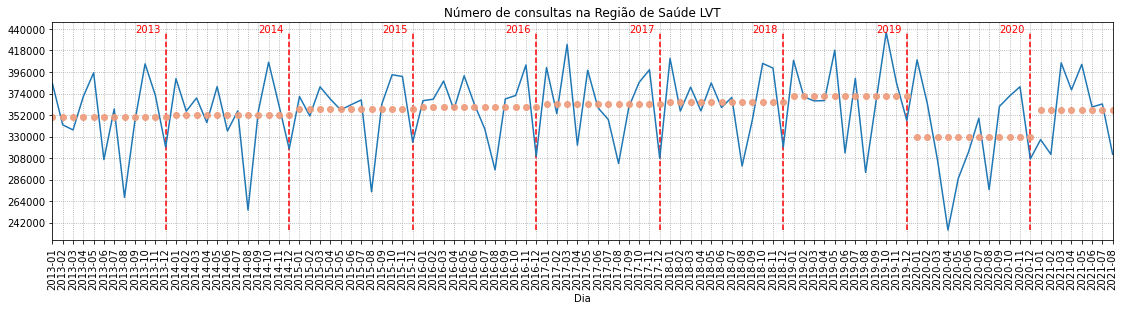

In [18]:
regiao = "Região de Saúde LVT"
reg_inst_dict = {}
for i in range(len(df_hosp)):
    if df_hosp.loc[i, 'Instituição'] not in reg_inst_dict:
        reg_inst_dict[df_hosp.loc[i, 'Instituição']] = df_hosp.loc[i, 'Região']

instit_LVT = [inst for inst in reg_inst_dict if reg_inst_dict[inst] == regiao]

df_diff_new_r = df_diff_new.iloc[[i for i in range(df_diff_new.shape[0]) if df_diff_new.index[i] in instit_LVT]].sum()

mean_per_year_r = np.array([df_diff_new_r[i-12:i].mean() for i in range(12, len(df_diff_new_r)+12, 12)])
means_r = np.array([mean_per_year_r[i] for i in range(df_diff_new.columns.year.nunique()) for j in range(12)])
means_r = means_r[:len(df_diff_new_r)]

ax=df_diff_new_r.plot(figsize=(19,4));
ax.set_xticks([offset+i for i in range(len(year_month_labels))]);
ax.set_xticklabels(year_month_labels, rotation=90);
ax.set_title(f'Número de consultas na {regiao}');
offset = ax.get_xticks()[0]
ymin_r, ymax_r = df_diff_new_r.min(), df_diff_new_r.max()
ax.vlines([offset+i for i in dezembro_idx], ymin_r, ymax_r, linestyles='dashed', colors='red');
ax.yaxis.set_major_locator(MultipleLocator(int(np.floor(ymax_r * 1.05 / 1000 / 20) * 1000)))
for i, year_pos in enumerate([offset+i for i in dezembro_idx]): 
    plt.text(year_pos-3, ymax_r*1.001, years_arr[i], fontdict=None, c='red')
ax.grid(which='major', color='#A0A0A0', linestyle=':');

plt.plot(ax.get_xticks(), means_r, 'o', color = "#ef9b7a", alpha=0.9);

increase_between_2013_2019 = 100*round(mean_per_year_r[-3]/mean_per_year_r[0] - 1.0, 4);
decrease_between_2019_2020 = round(100*(1-mean_per_year_r[-2]/mean_per_year_r[-3]),2);

Deste gráfico podemos concluir que em abril de 2020, o número total de consultas registadas na Região de LVT atingiu o seu valor mínimo desde que estes dados foram publicados, em 2013. Não se registava um valor tão baixo no número de consultas nesta região desde agosto de 2014!

In [19]:
print(f"Entre 2013 e 2019, o número médio de consultas subiu {mean_per_year_r[-3]/mean_per_year_r[0] - 1.0:.2%}.\
 No sentido oposto, a pandemia resultou numa diminuição de {1-mean_per_year_r[-2]/mean_per_year_r[-3]:.2%} no número médio de consultas de 2019 para\
 2020, o que se traduz numa descida de {mean_per_year_r[-3] - mean_per_year_r[-2]:.0f} no número médio de consultas na região LVT.")

Entre 2013 e 2019, o número médio de consultas subiu 6.12%. No sentido oposto, a pandemia resultou numa diminuição de 11.24% no número médio de consultas de 2019 para 2020, o que se traduz numa descida de 41771 no número médio de consultas na região LVT.


Vamos transpor a análise efetuada à Região LVT para todas as regiões e apenas para os anos de 2019 e 2020.

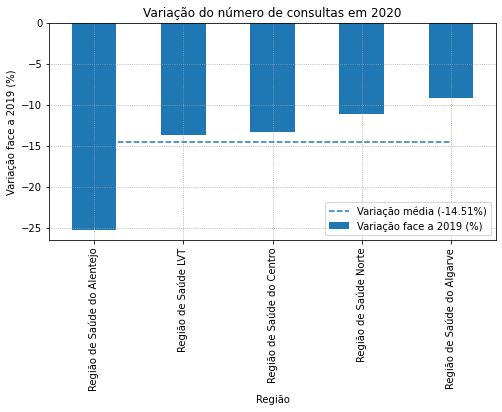

In [20]:
col = "Nº Consultas Médicas Total"

df_r = df_hosp.groupby(['Região', 'Período']).sum().copy().reset_index().set_index("Região")
df_r["Período"] = pd.to_datetime(df_r["Período"]).dt.year
df_r = df_r.groupby(["Região", "Período"]).sum().reset_index().set_index("Região")
df_r = pd.DataFrame(100*(df_r.loc[df_r.Período==2020, col] - df_r.loc[df_r.Período==2019, col]) / df_r.loc[df_r.Período==2020, col])
df_r.columns=[nome]

df_r.sort_values(by=nome, inplace=True)
ax = df_r.plot(figsize=(8,4), kind='bar')
ax.set_title('Variação do número de consultas em 2020');
ax.set_ylabel('Variação face a 2019 (%)');
ax.set_xticks(range(len(df_r)))
ax.set_xticklabels(df_r.index, rotation=90);
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.grid(which='major', color='#A0A0A0', linestyle=':')
média = np.ones(len(df_r.index))*df_r[nome].mean()
ax.plot(média, label=f"Variação média ({média[0]:.2f}%)", linestyle='--');
ax.legend(loc='lower right');

Há um decréscimo médio de 14.51% do número de consultas por Região, sendo o impacto algo variado, desde a ARS do Alentejo que prestou menos 25.26% consultas que no ano anterior, até à ARS do Algarve que efetuou menos 9.16% de consultas que no ano anterior.

### 2.D. Distribuição das consultas por região

<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

À semelhança do que fizemos com as instituições, vamos agora olhar para as consultas desde 2019 por região e ver se notamos algum padrão nas consultas mensais. Tal como para o caso anterior, excluímos da análise regiões que não tenham dados para todos os meses.

In [21]:
df_mes_r = df_mes.groupby(['Região', 'Período', 'Periodo_format_2']).sum().reset_index().set_index("Região").copy()
df_mes_r['Mês'] = pd.to_datetime(df_mes_r['Período'] , format='%Y-%m')
df_mes_r['Dia'] = pd.to_datetime(df_mes_r['Periodo_format_2'] , format='%Y/%m/%d')
df_mes_r = df_mes_r.reset_index()

reg_nmonths = df_mes_r.reset_index()[['Região','Mês']].groupby('Região').nunique()
all_reg = len(reg_nmonths)
reg_nmonths = reg_nmonths[reg_nmonths.Mês == reg_nmonths.Mês.max()].index
df_mes_r = df_mes_r[df_mes_r["Região"].isin(reg_nmonths)]
print(f"Existem {all_reg} regiões das quais vamos usar as \
{df_mes_r.Região.nunique()} que têm dados para todos os meses.")

Existem 5 regiões das quais vamos usar as 5 que têm dados para todos os meses.


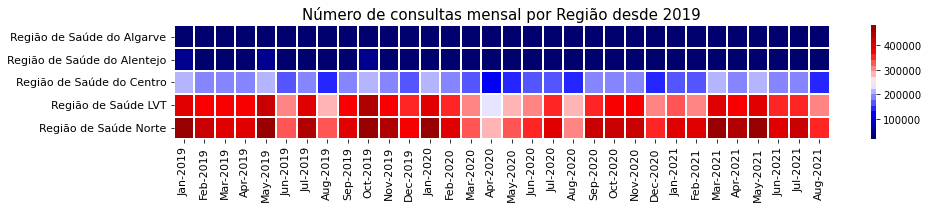

In [22]:
first_index_r = ((df_diff_new.columns >= '2019-01-01') == False).sum()
df_reg = get_df_diff(df_mes_r, first_index_r, col = 'Região')
df_reg.sort_values(by='2019-01-01', inplace=True)
fig, ax = plt.subplots(figsize=(14, 3))
ax = sns.heatmap(df_reg, square=False, annot=False, cmap=cmap, linewidths=1)
ax.set_yticklabels(df_reg.index, rotation=0, fontsize=11);
ax.set_xticklabels(get_month_labels_from_date_columns(df_reg), rotation=90, fontsize=11);
ax.set_xlabel(''); ax.set_ylabel('');
ax.set_title("Número de consultas mensal por Região desde 2019", fontsize=15);
plt.tight_layout()

Identifica-se agora de forma mais evidente: 
* menos consultas em Março, Abril e Maio de 2020, afetando especialmente nas regiões do Norte, Centro e Lisboa e Vale do Tejo, onde a densidade de utentes é maior.
* a retoma progressiva no número de consultas a partir de Março de 2021, para valores semelhantes aos registados em 2019 e, por vezes, até superiores, como é o caso das Regiões Norte e Lisboa e Vale do Tejo.

Vamos também comparar o número total de consultas mensais nos últimos 6 anos: 

In [23]:
first_index_2016 = ((df_diff_new.columns >= '2016-01-01') == False).sum()
df_inst_before_pandemic = get_df_diff(df_mes, first_index = first_index_2016)
df_inst_before_pandemic = df_inst_before_pandemic.iloc[:, :36]
df_inst_before_pandemic.sort_values(by='2016-01-01', inplace=True)

In [24]:
def plot_3_years(df, years_label, ylim_min=0):
    total_mensal = df.sum(axis=0)
    total_first_yr, total_second_yr, total_third_yr = total_mensal.iloc[:12],  total_mensal.iloc[12:24], total_mensal.iloc[24:36]
    fig, ax = plt.subplots(figsize=(12,6))
    first_yr_max_x, second_yr_max_x, third_yr_max_x = len(total_first_yr)*10, len(total_second_yr)*10 + 2, len(total_third_yr)*10 + 4
        
    ax.bar(range(0,first_yr_max_x,10),total_first_yr.values, width=2, label=years_label[0], color="#124984")
    ax.bar(range(2,second_yr_max_x,10),total_second_yr.values, width=2, label=years_label[1], color="#dd0000")
    ax.bar(range(4,third_yr_max_x,10),total_third_yr.values, width=2, label=years_label[2], color="#ef9b7a")
    ax.set_xticks(range(0,120,10))
    ax.set_xticklabels(month_abbr[1:], rotation=90, fontsize = 8);
    
    step = 100000 
    lim = int(step*(2+total_mensal.max()//step))
    ticks = list(range(0,lim,step))
    
    #alterar o limite inferior do eixo dos y para se fazer "zoom"
    min_ytick = sum(np.arange(0,lim,step)<ylim_min)
    ax.set_yticks(ticks[min_ytick-1:])
    
    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.grid(which='major', color='#A0A0A0', linestyle=':')
    ax.set_yticklabels([f"{i//step:,}" for i in ticks], rotation=90, fontsize = 8);
    ax.set_ylabel(f'Consultas Mensais (x{step:,})')
    ax.legend()
    ax.set_title(f"Comparação do total de consultas mensais em {years_label[0]}, {years_label[1]} e {years_label[2]}");

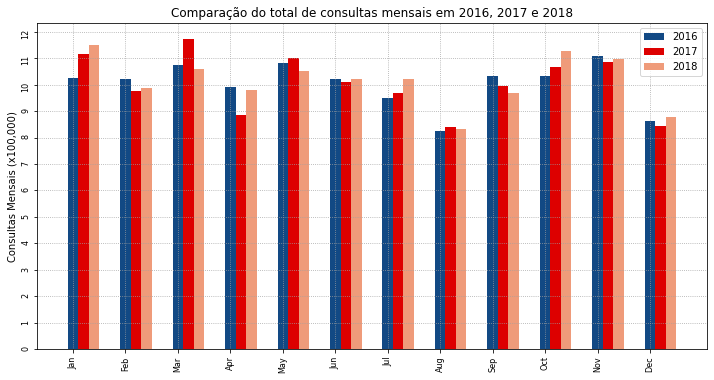

In [25]:
plot_3_years(df_inst_before_pandemic, ["2016", "2017", "2018"])

Este gráfico revela que agosto foi o mês com o menor número de consultas mensais nos anos de 2016, 2017 e 2018, que tende a recuperar até novembro.

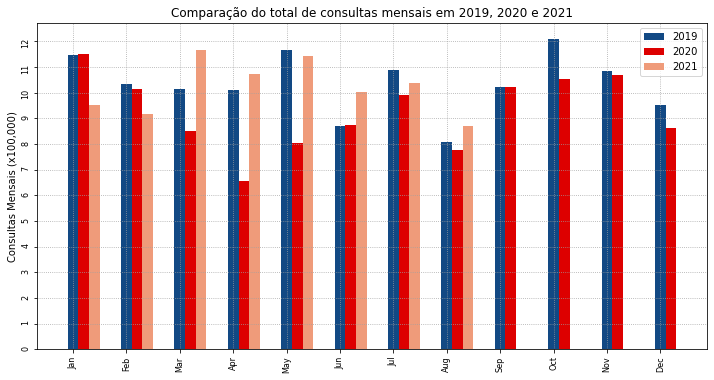

In [26]:
plot_3_years(df_inst, ["2019", "2020", "2021"])

As maiores diferenças entre o número de consultas mensais entre 2019 e 2020 registam-se nos meses de março, abril e maio, coincidindo com períodos de Estado de Emergência nacional, sendo o valor de consultas registadas em abril de 2020 o mais reduzido dos 6 anos estudados! O Estado de Emergência foi também implementado nos meses de Novembro e Dezembro de 2020 porém, verifica-se que a redução no nº de consultas não é tão significativa.

Resumindo, o principal impacto da pandemia parece ter-se concentrado em apenas 3 meses de 2020, tendo o número de consultas regressado a perto de níveis normais a partir de junho desse ano, demonstrando ainda melhor capacidade de resposta no ano de 2021. 

Agora que se avaliou a evolução do número de consultas ao longo dos vários meses do ano, vamos agrupar estes dados de forma a tirarmos conclusões acerca da evolução anual.

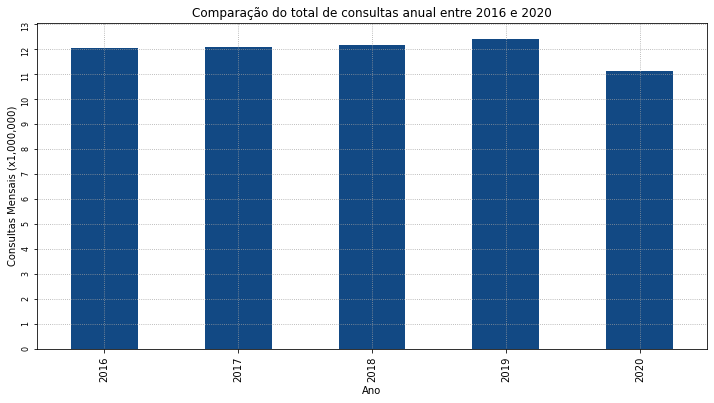

In [27]:
df_diff_new_after_2016 = df_diff_new.iloc[:, 36:]
df_per_year = df_diff_new_after_2016.T.groupby(df_diff_new_after_2016.T.index.year).sum().sum(axis=1)
df_per_year = df_per_year[:-1]

fig, ax = plt.subplots(figsize=(12,6))
ax.set_ylim(min(df_per_year)*0.95, max(df_per_year)*1.05);
df_per_year.plot(kind='bar', color = "#124984")

step = 1000000
lim = int(step*(2+df_per_year.max()//step))
ticks = list(range(0,lim,step))

ax.set_yticks(ticks)
ax.yaxis.set_major_locator(FixedLocator(ticks))
ax.grid(which='major', color='#A0A0A0', linestyle=':')
ax.set_yticklabels([f"{i//step:,}" for i in ticks], rotation=90, fontsize = 8);
ax.set_xlabel(f'Ano')
ax.set_ylabel(f'Consultas Mensais (x{step:,})')
ax.set_title("Comparação do total de consultas anual entre 2016 e 2020");

Este gráfico confirma o comportamento crescente do número de consultas global entre 2016 e 2019 e a ligeira quebra provocada pela pandemia em 2020.

## 3. Conclusão
<div align="right"><a href="#Índice">Voltar ao Índice</a></div>

Assim terminamos o nosso Tutorial para utilizar a API da Área de Transparência do Portal do Serviço Nacional de Saúde.

Com este tutorial, aprendemos a:
* __Obter dados__ utilizando a API disponibilizada pela área de Transparência do Portal do SNS;
* __Analisar os dados__ ao nível das distribuições de população e instituições hospitalares pelas diversas regiões cobertas pelas Administrações Regionais de Saúde em Portugal Continental;
* __Formular e sustentar uma hipótese__ sobre o impacto da COVID-19 no SNS considerando o número de Consultas Médicas Hospitalares antes e durante a pandemia.

Sugerimos aplicar as técnicas ilustradas neste tutorial para investigar:

* Impacto por tipo de consulta (de que forma a pandemia veio afetar o número de primeiras consultas face às consultas de seguimento?)
* Impacto da pandemia por especialidade médica
* Correlação entre o número de casos de covid no mês e o desvio no número de consultas no mês seguinte por zona geográfica 

A consciencialização e a tomada de decisões suportadas por dados são e serão cada vez mais importantes no mundo em que vivemos, de forma a combater falsa propaganda e a aumentar a literacia das massas.<br>
Agradecemos o vosso interesse e por fazerem parte desta evolução!

---

__Equipa:__
<ul>
Francisco Tomás Pereira, NTT DATA Portugal (<a href="https://www.linkedin.com/in/franciscotomaspereira/">LinkedIn</a>)
<br>José Araújo Varela, NTT DATA Portugal (<a href="https://www.linkedin.com/in/zevarela/">LinkedIn</a>)
<br>Pedro Miguel Reis, NTT DATA Portugal (<a href="https://www.linkedin.com/in/pedrom-reis/">LinkedIn</a>)
<br>Sofia Prates Silvestre, NTT DATA Portugal (<a href="https://www.linkedin.com/in/sofia-silvestre/">LinkedIn</a>)
</ul>

__Data:__
<ul>Setembro/2021</ul>
<br>
<a href="https://www.everis.com/portugal" target="_blank"><img src="assets/NTT DATA Gris_rgb.jpg" width="450"/></a>